https://canvas.northwestern.edu/courses/167719/assignments/1078596

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#Import train.csv and test.csv from the Kaggle page linked above
df = pd.read_csv ('train.csv')


# EDA

#### Intro Stats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [5]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### EDA SalePrice Graphs

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

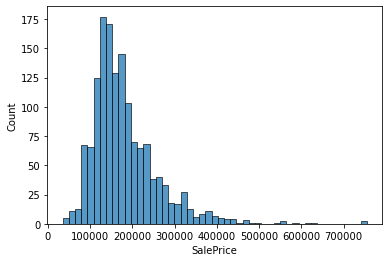

In [6]:
sns.histplot(x="SalePrice", data=df)

<AxesSubplot:xlabel='SalePrice'>

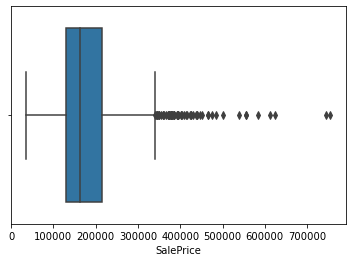

In [7]:
sns.boxplot(x="SalePrice", data=df)

#### Investigate Missing Data and Outliers

##### Missing Data:

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

The following categories have null values: 

*   LotFrontage
*   Alley
*   MasVnrType
*   MasVnrArea
*   BsmtQual
*   BsmtCond
*   BsmtExposure
*   BsmtFinType1
*   BsmtFinType2
*   Electrical
*   FireplaceQu
*   GarageType
*   GarageYrBlt
*   GarageFinish
*   GarageQual
*   GarageCond
*   PoolQC
*   Fence
*   MiscFeature

We're not concerned about most of these columns having null values. It makes sense that some of the data would be missing for each (if a house doesn't have a pool, for example). We're going to drop all of the columns that have null values with the exception of "Electrical." For 'Electrical,' we'll remove the row with the null value. 

In [9]:
col_to_drop = ['LotFrontage','Alley','MasVnrType','MasVnrArea',
               'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 

df2 = df.drop(columns=col_to_drop, inplace=False)
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

##### Outliers

In [10]:
df3['SalePrice'].describe(percentiles = [.25, .5, .75, .95])

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
95%      326200.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
#This code trims data to a certain number of standard deviations from the mean. We went with two, which represents the middle 95% of values. 
#You can see in the graphs below that it removes many outliers and normalizes the data.

from scipy import stats
import numpy as np

df4 = df3[(np.abs(stats.zscore(df3['SalePrice'])) < 2)]

##### EDA SalePrice Stats/Graphs (Cleaned Data)

In [12]:
df4["SalePrice"].describe()

count      1396.000000
mean     169995.874642
std       58943.796385
min       34900.000000
25%      128987.500000
50%      159467.000000
75%      203000.000000
max      339750.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

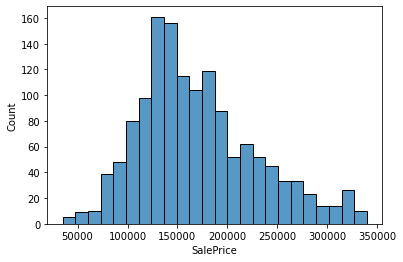

In [13]:
sns.histplot(x="SalePrice", data=df4)

<AxesSubplot:xlabel='SalePrice'>

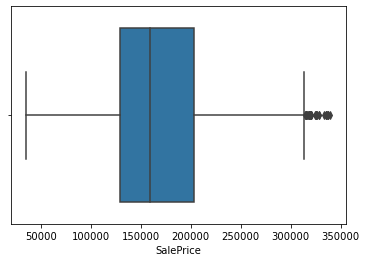

In [14]:
sns.boxplot(x="SalePrice", data=df4)

#### Correlations

Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

Text(0.5, 1.0, 'Correlation Heatmap')

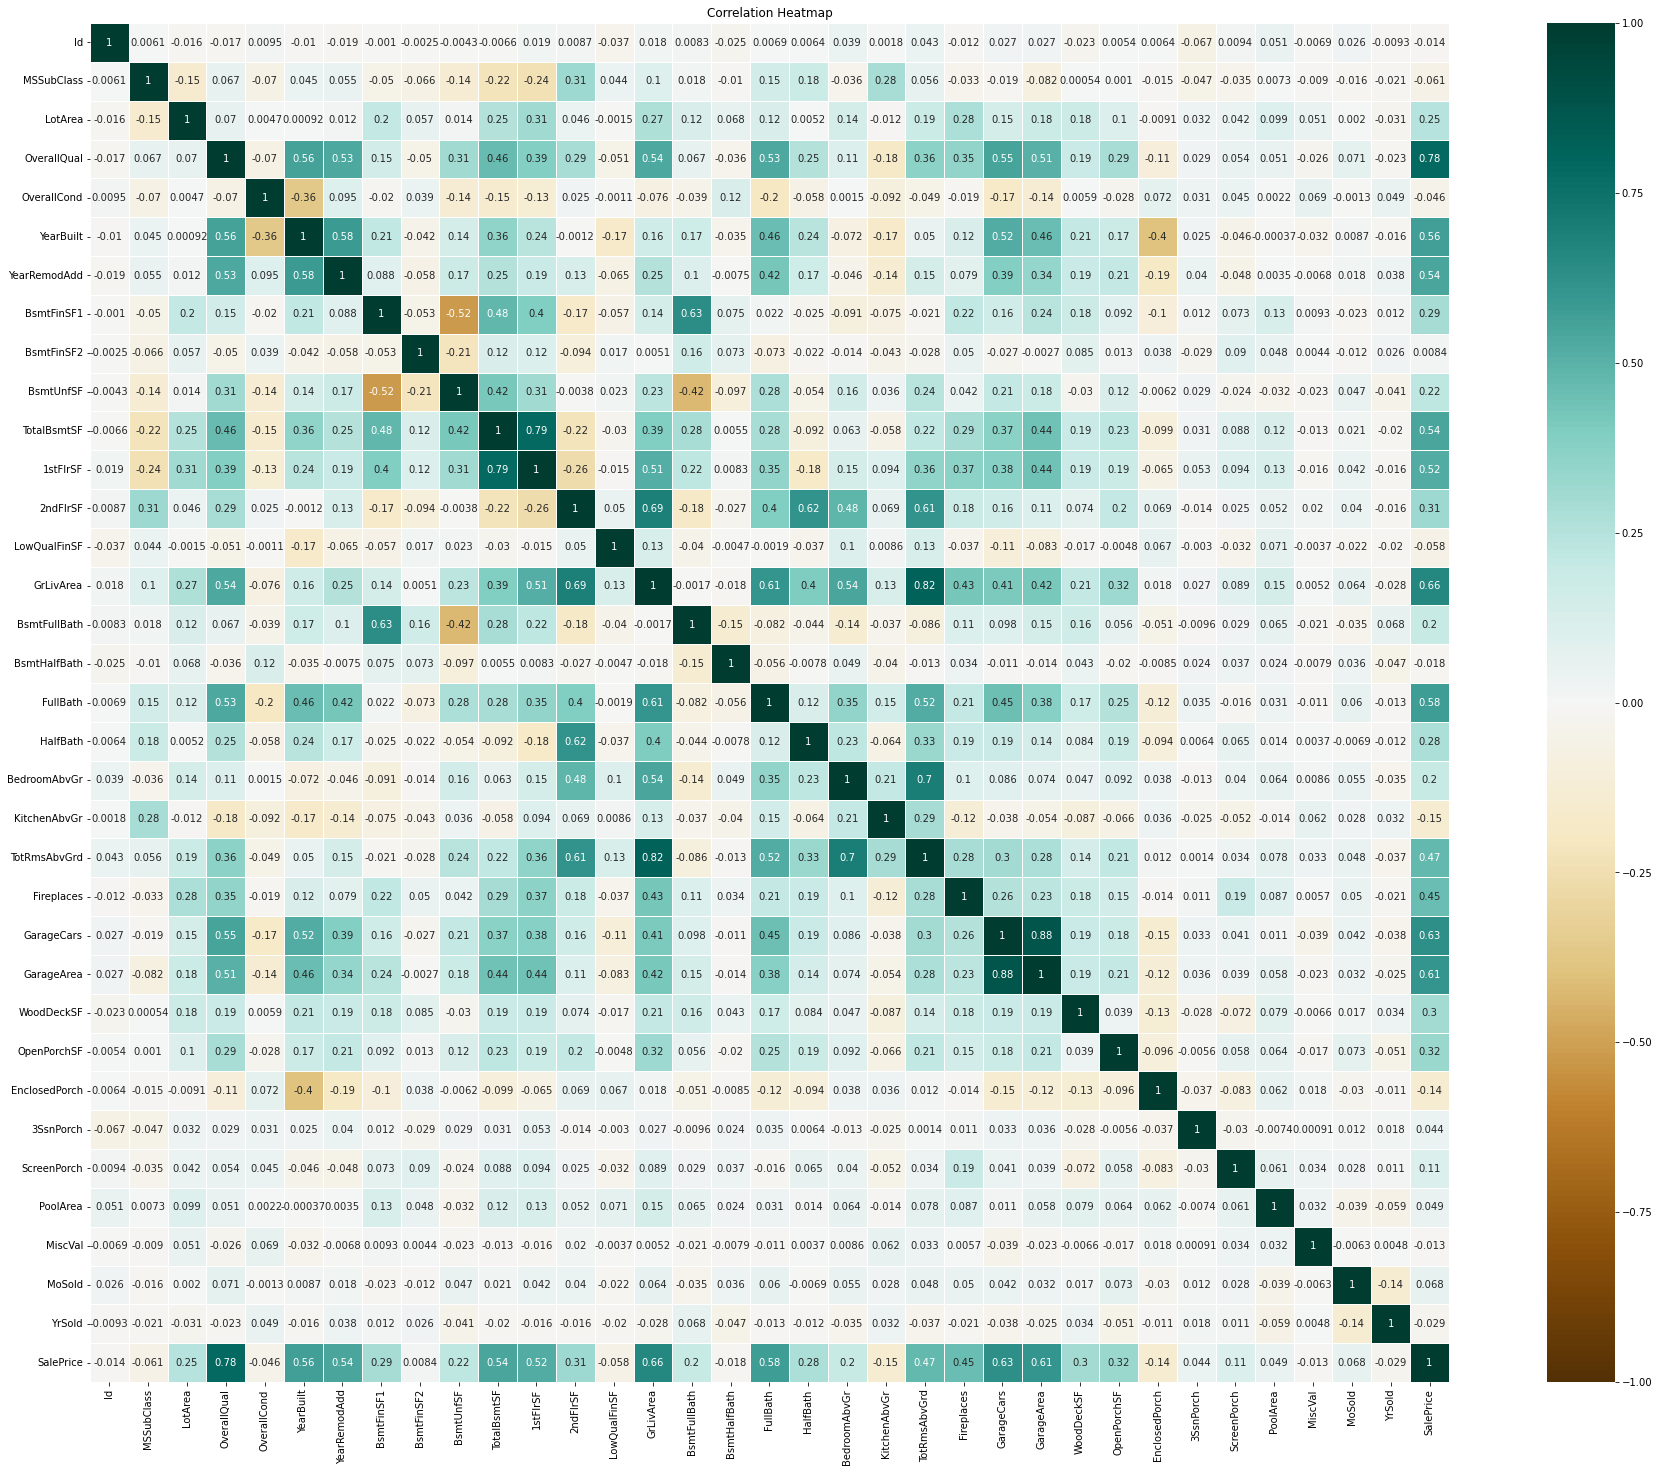

In [15]:
# creating correlation heatmap to determine potential predictor variables
corr_mat = df4.corr()
f, ax = plt.subplots(figsize=(35, 25))
sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, square=True, linewidths=.5, cmap='BrBG')
plt.title('Correlation Heatmap')

The 3 variables with the highest correlation to SalesPrice are OverallQual (0.78), GrLivArea (0.66), and GarageCars (0.63). These are potential predictor variables for SalesPrice which is our dependent variable.

#### Scatterplots for [OverallQual] [GrLivArea] [GarageArea]

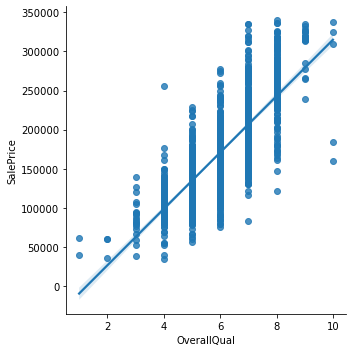

In [16]:
#sns.scatterplot(x='OverallQual', y='SalePrice', data=df4)
sns.lmplot(x='OverallQual', y='SalePrice', data=df4)

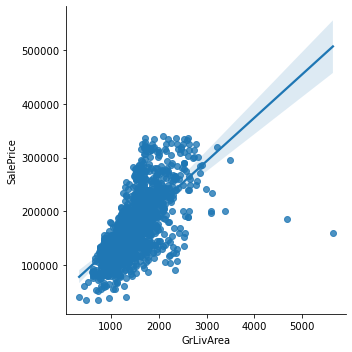

In [17]:
#sns.scatterplot(x="GrLivArea", y="SalePrice", data=df4)
sns.lmplot(x="GrLivArea", y="SalePrice", data=df4)

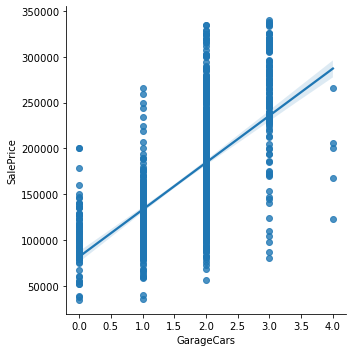

In [18]:
#sns.scatterplot(x="GarageCars", y="SalePrice", data=df4)
sns.lmplot(x="GarageCars", y="SalePrice", data=df4)

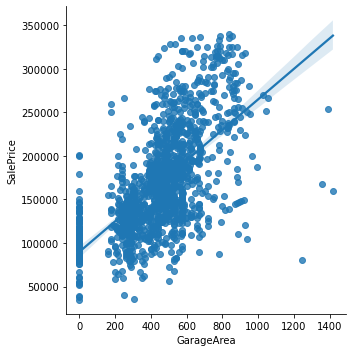

In [19]:
#sns.scatterplot(x="GarageArea", y="SalePrice", data=df4)
sns.lmplot(x="GarageArea", y="SalePrice", data=df4)

#### New Predictors (Total Square Feet [tot_sq] and Quality Space [qual_space]

Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In [20]:
# sum 1st floor, 2nd floor, and basement square footage to get total square footage
sum_column = df4['1stFlrSF'] + df4['2ndFlrSF'] + df4['TotalBsmtSF']

# multiply total square footage by overall quality to generate new predictor variable qual_space
mult_column = sum_column*df4['OverallQual']

# add new predictor variables to dataframe
df4['tot_sq'] = sum_column
df4['qual_space'] = mult_column
print(df4)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... ScreenPorch PoolArea MiscVal MoSold  \
0       AllPub    Inside       Gtl  ...           0     

C:\Users\watsonz\AppData\Local\Temp\ipykernel_21836\239284426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tot_sq'] = sum_column
C:\Users\watsonz\AppData\Local\Temp\ipykernel_21836\239284426.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['qual_space'] = mult_column


<AxesSubplot:xlabel='qual_space', ylabel='SalePrice'>

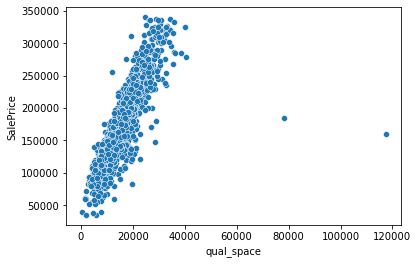

In [21]:
sns.scatterplot(x="qual_space", y="SalePrice", data=df4)

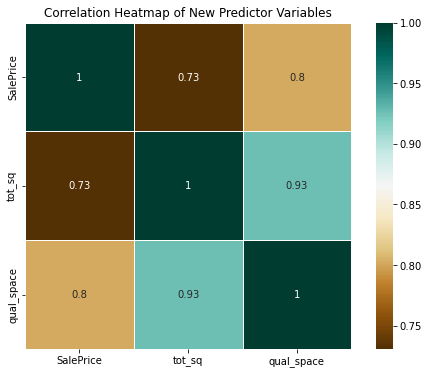

In [22]:
# setting the columns to correlate
columns = ['SalePrice', 'tot_sq', 'qual_space']
df_corr = df4[columns]
# running the correlation
df_corr.corr()

# setting up the heatmap
corrmat = df_corr.corr()

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=1, square=True, annot=True, cmap='BrBG', linewidths=.5 )
plt.title('Correlation Heatmap of New Predictor Variables')

# images can be saved - default is .png
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('Correlation Heatmap of New Predictor Variables')

#### Min-Max Scaling for Pricing


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# reshape to SalePrice 2D array and perform min-max scaling
mmscaled_data = mm_scaler.fit_transform(df4['SalePrice'].values.reshape(-1,1))

print(mmscaled_data)

[[0.56946039]
 [0.48089224]
 [0.61866492]
 ...
 [0.75971789]
 [0.35173036]
 [0.36936198]]


In [24]:
# checking min and max
print(mmscaled_data.min())
print(mmscaled_data.max())

0.0
1.0


In [25]:
# reshape to SalePrice 2D array and perform standard scaling
stdscaled_data = std_scaler.fit_transform(df4['SalePrice'].values.reshape(-1,1))

print(stdscaled_data)

[[ 0.65346866]
 [ 0.19524104]
 [ 0.90803956]
 ...
 [ 1.63780948]
 [-0.47300758]
 [-0.38178634]]


In [26]:
# checking mean and standard deviation
print(stdscaled_data.mean())
print(stdscaled_data.std())

2.1440983340898438e-16
1.0


In [27]:
# add scaled sale price to dataframe
df4['MinMaxScaled_SalePrice'] = mmscaled_data
df4['StdScaled_SalePrice'] = stdscaled_data

C:\Users\watsonz\AppData\Local\Temp\ipykernel_21836\647750776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['MinMaxScaled_SalePrice'] = mmscaled_data
C:\Users\watsonz\AppData\Local\Temp\ipykernel_21836\647750776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['StdScaled_SalePrice'] = stdscaled_data


# Regressions

#### Liner Regression Model One ([OverallQual] [GRliveArea] [GarageCars])

In [33]:
# assigning the 3 predictor variables with the highest correlation coefficient
features = ['OverallQual', 'GrLivArea', 'GarageCars']

In [34]:
X = df4[features]

In [35]:
y = df4['SalePrice']

In [36]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# creating linear regression model
model_1 = LinearRegression().fit(X_train, y_train)

In [38]:
# display model coefficients and r-sqaured scores
print('Coefficient:', model_1.coef_)
print('Scores:', model_1.score(X_train, y_train), model_1.score(X_test, y_test))

Coefficient: [22662.77685508    35.27537731 19875.9200822 ]
Scores: 0.7286420265854436 0.7442832958076211


In [39]:
# predicted housing prices
y_prediction = model_1.predict(X_test)

In [40]:
# model RMSE 
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

28262.71855795518


#### Liner Regression Model Two ([OverallQual])

In [41]:
x = df4['OverallQual'].values.reshape((-1, 1))
y = df4['SalePrice']

# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creating linear regression model
model_2 = LinearRegression().fit(X_train, y_train)

# display model coefficients and r-sqaured scores
print('Coefficient:', model_2.coef_)
print('Scores:', model_2.score(X_train, y_train), model_2.score(X_test, y_test))

# predicted housing prices
y_prediction = model_2.predict(X_test)

# model RMSE 
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('RMSE:', RMSE)

Coefficient: [36054.40278892]
Scores: 0.6128972608954553 0.6187936765567974
RMSE: 34507.574371186674


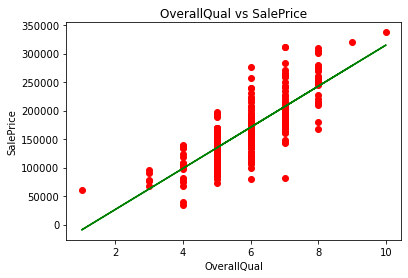

In [42]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, model_2.predict(X_train), color = "green")
plt.title("OverallQual vs SalePrice")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

#### Liner Regression Model Three ([qual_space])

In [43]:
x = df4['qual_space'].values.reshape((-1, 1))
y = df4['SalePrice']

# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creating linear regression model
model_3 = LinearRegression().fit(X_train, y_train)

# display model coefficients and r-sqaured scores
print('Coefficient:', model_3.coef_)
print('Scores:', model_3.score(X_train, y_train), model_3.score(X_test, y_test))

# predicted housing prices
y_prediction = model_3.predict(X_test)

# model RMSE 
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

Coefficient: [6.14656749]
Scores: 0.6236730363612033 0.7226340157102138
29434.79286723823


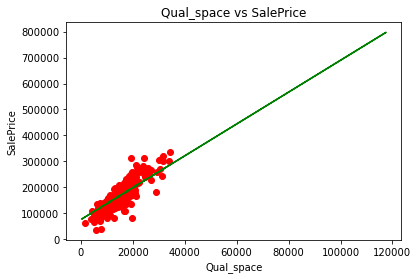

In [44]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, model_3.predict(X_train), color = "green")
plt.title("Qual_space vs SalePrice")
plt.xlabel("Qual_space")
plt.ylabel("SalePrice")
plt.show()

#### Liner Regression Model Four ([qual_space] and [GarageCars])

In [45]:
features_2 = ['qual_space', 'GarageCars']

In [46]:
x = df4[features_2]

In [47]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
# creating linear regression model
model_4 = LinearRegression().fit(X_train, y_train)

# display model coefficients and r-sqaured scores
print('Coefficient:', model_4.coef_)
print('Scores:', model_4.score(X_train, y_train), model_4.score(X_test, y_test))

Coefficient: [4.96444291e+00 2.38195881e+04]
Scores: 0.6834845496665918 0.7582239554953171


In [49]:
# predicted housing prices
y_prediction = model_4.predict(X_test)

# model RMSE
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

27481.537013139783


When comparing the linear regression models above, the final model using [OverallQual] and [GarageCars] produced the best fit as shown by having the lowest Root Mean Square Error (RMSE).

# Testing

In [50]:
# create dataframe using test data from kaggle
df_test = pd.read_csv("test.csv")

In [51]:
# replace NaN values with zero for the test data
df_test = df_test.fillna(0)

In [52]:
#Repeat the process to create the 'Overall Quality' variable for the testing dataframe.

# sum 1st floor, 2nd floor, and basement square footage to get total square footage
sum_column = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['TotalBsmtSF']

# multiply total square footage by overall quality to generate new predictor variable qual_space
mult_column = sum_column*df_test['OverallQual']

# add new predictor variables to dataframe
df_test['tot_sq'] = sum_column
df_test['qual_space'] = mult_column

In [53]:
features_test = ['qual_space', 'GarageCars']

In [54]:
X = df_test[features_test]

In [55]:
test_prediction = model_4.predict(X)

In [56]:
df = pd.DataFrame({'id':df_test['Id'], 'SalePrice':test_prediction})
df.to_csv('group_5_msds_422_module_2.csv', index=False)